### 음식 사진을 올려 음식을 판별하는 모델

- 데이터 수집
    - 한식(5개)
        - 갈비찜, 불고기, 미역국, 된장국, 잡채
    - 양식(5개)
        - 알리오올리오, 크림파스타, 토마토파스타, 샐러드, 스테이크
        
- 음식 사진 각각 3600개(훈련), 1200개(검증) 사용

- 모델 설계 (현재 기준입니다!)
    1. 기본 설계 : 85% 정확도
    2. resnet50 : 90% 정확도
    3. Xception : 93% 정확도

#### 데이터 수집 및 전처리

훈련, 테스트 디렉토리 설정

In [1]:
import os, os.path, shutil, zipfile

# 각 폴더를 생성
# 원 훈련 데이터가 들어있는 폴더
original_dataset_dir = "./datasets/"

# 일부 데이터가 들어갈 폴더 생성
base_dir = "./datasets/foodimage"
if not os.path.exists(base_dir):
    os.mkdir(base_dir)
    
# ./data/foodimage/train
# 이어지는 폴더를 연결해준다

train_dir = os.path.join(base_dir, "train")
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
test_dir = os.path.join(base_dir, "test")
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

훈련 검증 개수 설정

traincount = range(3600)
testcount = range(3600,4800)

설정한 개수에 맞게 미리 한 폴더에 넣어놓은 음식 사진들을 훈련 검증 데이터로 나누기(최초 1회만 실행)

# aglio 알리오올리오
# 훈련 검증 폴더 지정(없으면 만들기)
train_aglio_dir = os.path.join(train_dir, "aglio")
if not os.path.exists(train_aglio_dir):
    os.mkdir(train_aglio_dir)
test_aglio_dir = os.path.join(test_dir, "aglio")
if not os.path.exists(test_aglio_dir):
    os.mkdir(test_aglio_dir)

# 훈련 데이터 생성
fnames = ["aglio.{}.png".format(i) for i in traincount]

food_dataset_dir = os.path.join(original_dataset_dir, "aglio")

for fname in fnames:
    # 원래 이미지가 있는 폴더와 파읾명
    src = os.path.join(food_dataset_dir, fname)
    # 복사할 위치의 폴더와 파일명
    dst = os.path.join(train_aglio_dir, fname)
    shutil.copyfile(src,dst)

# 검증 데이터 생성
fnames = ["aglio.{}.png".format(i) for i in testcount]

for fname in fnames:
    # 원래 이미지가 있는 폴더와 파읾명
    src = os.path.join(food_dataset_dir, fname)
    # 복사할 위치의 폴더와 파일명
    dst = os.path.join(test_aglio_dir, fname)
    shutil.copyfile(src,dst)

# bulgogi 불고기
train_bulgogi_dir = os.path.join(train_dir, "bulgogi")
if not os.path.exists(train_bulgogi_dir):
    os.mkdir(train_bulgogi_dir)
test_bulgogi_dir = os.path.join(test_dir, "bulgogi")
if not os.path.exists(test_bulgogi_dir):
    os.mkdir(test_bulgogi_dir)
    
fnames = ["bulgogi.{}.png".format(i) for i in traincount]

food_dataset_dir = os.path.join(original_dataset_dir, "bulgogi")

for fname in fnames:
    # 원래 이미지가 있는 폴더와 파읾명
    src = os.path.join(food_dataset_dir, fname)
    # 복사할 위치의 폴더와 파일명
    dst = os.path.join(train_bulgogi_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ["bulgogi.{}.png".format(i) for i in testcount]

for fname in fnames:
    # 원래 이미지가 있는 폴더와 파읾명
    src = os.path.join(food_dataset_dir, fname)
    # 복사할 위치의 폴더와 파일명
    dst = os.path.join(test_bulgogi_dir, fname)
    shutil.copyfile(src,dst)

# Cpasta 크림파스타
train_Cpasta_dir = os.path.join(train_dir, "Cpasta")
if not os.path.exists(train_Cpasta_dir):
    os.mkdir(train_Cpasta_dir)
test_Cpasta_dir = os.path.join(test_dir, "Cpasta")
if not os.path.exists(test_Cpasta_dir):
    os.mkdir(test_Cpasta_dir)
    
fnames = ["Cpasta.{}.png".format(i) for i in traincount]

food_dataset_dir = os.path.join(original_dataset_dir, "Cpasta")

for fname in fnames:
    # 원래 이미지가 있는 폴더와 파읾명
    src = os.path.join(food_dataset_dir, fname)
    # 복사할 위치의 폴더와 파일명
    dst = os.path.join(train_Cpasta_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ["Cpasta.{}.png".format(i) for i in testcount]

for fname in fnames:
    # 원래 이미지가 있는 폴더와 파읾명
    src = os.path.join(food_dataset_dir, fname)
    # 복사할 위치의 폴더와 파일명
    dst = os.path.join(test_Cpasta_dir, fname)
    shutil.copyfile(src,dst)

# galbijjim 갈비찜
train_galbijjim_dir = os.path.join(train_dir, "galbijjim")
if not os.path.exists(train_galbijjim_dir):
    os.mkdir(train_galbijjim_dir)
test_galbijjim_dir = os.path.join(test_dir, "galbijjim")
if not os.path.exists(test_galbijjim_dir):
    os.mkdir(test_galbijjim_dir
             
            fnames = ["galbijjim.{}.png".format(i) for i in traincount]

food_dataset_dir = os.path.join(original_dataset_dir, "galbijjim")

for fname in fnames:
    # 원래 이미지가 있는 폴더와 파읾명
    src = os.path.join(food_dataset_dir, fname)
    # 복사할 위치의 폴더와 파일명
    dst = os.path.join(train_galbijjim_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ["galbijjim.{}.png".format(i) for i in testcount]

for fname in fnames:
    # 원래 이미지가 있는 폴더와 파읾명
    src = os.path.join(food_dataset_dir, fname)
    # 복사할 위치의 폴더와 파일명
    dst = os.path.join(test_galbijjim_dir, fname)
    shutil.copyfile(src,dst)ㅍ

# jabchae 잡채
train_jabchae_dir = os.path.join(train_dir, "jabchae")
if not os.path.exists(train_jabchae_dir):
    os.mkdir(train_jabchae_dir)
test_jabchae_dir = os.path.join(test_dir, "jabchae")
if not os.path.exists(test_jabchae_dir):
    os.mkdir(test_jabchae_dir)
    
fnames = ["jabchae.{}.png".format(i) for i in traincount]

food_dataset_dir = os.path.join(original_dataset_dir, "jabchae")

for fname in fnames:
    # 원래 이미지가 있는 폴더와 파읾명
    src = os.path.join(food_dataset_dir, fname)
    # 복사할 위치의 폴더와 파일명
    dst = os.path.join(train_jabchae_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ["jabchae.{}.png".format(i) for i in testcount]

for fname in fnames:
    # 원래 이미지가 있는 폴더와 파읾명
    src = os.path.join(food_dataset_dir, fname)
    # 복사할 위치의 폴더와 파일명
    dst = os.path.join(test_jabchae_dir, fname)
    shutil.copyfile(src,dst)

# salad 샐러드
train_salad_dir = os.path.join(train_dir, "salad")
if not os.path.exists(train_salad_dir):
    os.mkdir(train_salad_dir)
test_salad_dir = os.path.join(test_dir, "salad")
if not os.path.exists(test_salad_dir):
    os.mkdir(test_salad_dir)
    
fnames = ["salad.{}.png".format(i) for i in traincount]

food_dataset_dir = os.path.join(original_dataset_dir, "salad")

for fname in fnames:
    # 원래 이미지가 있는 폴더와 파읾명
    src = os.path.join(food_dataset_dir, fname)
    # 복사할 위치의 폴더와 파일명
    dst = os.path.join(train_salad_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ["salad.{}.png".format(i) for i in testcount]

for fname in fnames:
    # 원래 이미지가 있는 폴더와 파읾명
    src = os.path.join(food_dataset_dir, fname)
    # 복사할 위치의 폴더와 파일명
    dst = os.path.join(test_salad_dir, fname)
    shutil.copyfile(src,dst)

# SeaMustardSoup 미역국
train_SeaMustardSoup_dir = os.path.join(train_dir, "SeaMustardSoup")
if not os.path.exists(train_SeaMustardSoup_dir):
    os.mkdir(train_SeaMustardSoup_dir)
test_SeaMustardSoup_dir = os.path.join(test_dir, "SeaMustardSoup")
if not os.path.exists(test_SeaMustardSoup_dir):
    os.mkdir(test_SeaMustardSoup_dir)
    
fnames = ["SeaMustardSoup.{}.png".format(i) for i in traincount]

food_dataset_dir = os.path.join(original_dataset_dir, "SeaMustardSoup")

for fname in fnames:
    # 원래 이미지가 있는 폴더와 파읾명
    src = os.path.join(food_dataset_dir, fname)
    # 복사할 위치의 폴더와 파일명
    dst = os.path.join(train_SeaMustardSoup_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ["SeaMustardSoup.{}.png".format(i) for i in testcount]

for fname in fnames:
    # 원래 이미지가 있는 폴더와 파읾명
    src = os.path.join(food_dataset_dir, fname)
    # 복사할 위치의 폴더와 파일명
    dst = os.path.join(test_SeaMustardSoup_dir, fname)
    shutil.copyfile(src,dst)

# soybean_soup 된장국
train_soybean_soup_dir = os.path.join(train_dir, "soybean_soup")
if not os.path.exists(train_soybean_soup_dir):
    os.mkdir(train_soybean_soup_dir)
test_soybean_soup_dir = os.path.join(test_dir, "soybean_soup")
if not os.path.exists(test_soybean_soup_dir):
    os.mkdir(test_soybean_soup_dir)
    
fnames = ["soybean_soup.{}.png".format(i) for i in traincount]

food_dataset_dir = os.path.join(original_dataset_dir, "soybean_soup")

for fname in fnames:
    # 원래 이미지가 있는 폴더와 파읾명
    src = os.path.join(food_dataset_dir, fname)
    # 복사할 위치의 폴더와 파일명
    dst = os.path.join(train_soybean_soup_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ["soybean_soup.{}.png".format(i) for i in testcount]

for fname in fnames:
    # 원래 이미지가 있는 폴더와 파읾명
    src = os.path.join(food_dataset_dir, fname)
    # 복사할 위치의 폴더와 파일명
    dst = os.path.join(test_soybean_soup_dir, fname)
    shutil.copyfile(src,dst)

# tomatopasta 토마토파스타
train_tomatopasta_dir = os.path.join(train_dir, "tomatopasta")
if not os.path.exists(train_tomatopasta_dir):
    os.mkdir(train_tomatopasta_dir)
test_tomatopasta_dir = os.path.join(test_dir, "tomatopasta")
if not os.path.exists(test_tomatopasta_dir):
    os.mkdir(test_tomatopasta_dir)
    
fnames = ["tomatopasta.{}.png".format(i) for i in traincount]

food_dataset_dir = os.path.join(original_dataset_dir, "tomatopasta")

for fname in fnames:
    # 원래 이미지가 있는 폴더와 파읾명
    src = os.path.join(food_dataset_dir, fname)
    # 복사할 위치의 폴더와 파일명
    dst = os.path.join(train_tomatopasta_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ["tomatopasta.{}.png".format(i) for i in testcount]

for fname in fnames:
    # 원래 이미지가 있는 폴더와 파읾명
    src = os.path.join(food_dataset_dir, fname)
    # 복사할 위치의 폴더와 파일명
    dst = os.path.join(test_tomatopasta_dir, fname)
    shutil.copyfile(src,dst)

# steak 스테이크
train_steak_dir = os.path.join(train_dir, "steak")
if not os.path.exists(train_steak_dir):
    os.mkdir(train_steak_dir)
test_steak_dir = os.path.join(test_dir, "steak")
if not os.path.exists(test_steak_dir):
    os.mkdir(test_steak_dir)
    
fnames = ["steak.{}.png".format(i) for i in traincount]

food_dataset_dir = os.path.join(original_dataset_dir, "steak")

for fname in fnames:
    # 원래 이미지가 있는 폴더와 파읾명
    src = os.path.join(food_dataset_dir, fname)
    # 복사할 위치의 폴더와 파일명
    dst = os.path.join(train_steak_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ["steak.{}.png".format(i) for i in testcount]

for fname in fnames:
    # 원래 이미지가 있는 폴더와 파읾명
    src = os.path.join(food_dataset_dir, fname)
    # 복사할 위치의 폴더와 파일명
    dst = os.path.join(test_steak_dir, fname)
    shutil.copyfile(src,dst)

데이터 증식

In [2]:
import numpy as np


def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        if input_img.ndim == 3:
            img_h, img_w, img_c = input_img.shape
        elif input_img.ndim == 2:
            img_h, img_w = input_img.shape

        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            if input_img.ndim == 3:
                c = np.random.uniform(v_l, v_h, (h, w, img_c))
            if input_img.ndim == 2:
                c = np.random.uniform(v_l, v_h, (h, w))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w] = c

        return input_img

    return eraser

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 증식 설정
train_dataGen = ImageDataGenerator(rescale=1./255,
                            rotation_range=20,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode="nearest",
                            preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=True))

test_dataGen = ImageDataGenerator(rescale=1./255)

총 36000개 훈련 이미지, 12000개 검증 이미지

In [4]:
train_generator = train_dataGen.flow_from_directory(train_dir,
                                                   target_size=(224, 224),
                                                   batch_size=50,
                                                   class_mode="categorical")
validation_generator = test_dataGen.flow_from_directory(test_dir,
                                                 target_size=(224, 224),
                                                 batch_size=50,
                                                 class_mode="categorical")

Found 36000 images belonging to 10 classes.
Found 12000 images belonging to 10 classes.


라벨링 결과 확인

In [5]:
print(train_generator.class_indices)
print(validation_generator.class_indices)

{'Cpasta': 0, 'SeaMustardSoup': 1, 'aglio': 2, 'bulgogi': 3, 'galbijjim': 4, 'jabchae': 5, 'salad': 6, 'soybean_soup': 7, 'steak': 8, 'tomatopasta': 9}
{'Cpasta': 0, 'SeaMustardSoup': 1, 'aglio': 2, 'bulgogi': 3, 'galbijjim': 4, 'jabchae': 5, 'salad': 6, 'soybean_soup': 7, 'steak': 8, 'tomatopasta': 9}


####  모델 설계

- 가장 성능이 좋았던 Xception 전이학습 모델
- imagenet 가중치를 받아와서 상위 층 레이어만 훈련 가능하도록 설계

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import DenseNet121

dense_base=DenseNet121(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
model = Sequential()
model.add(dense_base)
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 7, 7, 1024)        7037504   
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               6422656   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 13,461,450
Trainable params: 13,377,802
Non-trainable params: 83,648
_________________________________________________________________


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import Xception

xcep_base=Xception(weights=None, include_top=False, input_shape=(224, 224, 3))
model = Sequential()
model.add(xcep_base)
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.summary()

In [7]:
# 동결되기 전의 훈련되는 가중치의 수
print(len(model.trainable_weights))

366


14번째 블럭 레이어들은 동결 해제

In [8]:
dense_base.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [9]:
for layer in dense_base.layers:
    print(layer.name[:13])

input_1
zero_padding2
conv1/conv
conv1/bn
conv1/relu
zero_padding2
pool1
conv2_block1_
conv2_block1_
conv2_block1_
conv2_block1_
conv2_block1_
conv2_block1_
conv2_block1_
conv2_block2_
conv2_block2_
conv2_block2_
conv2_block2_
conv2_block2_
conv2_block2_
conv2_block2_
conv2_block3_
conv2_block3_
conv2_block3_
conv2_block3_
conv2_block3_
conv2_block3_
conv2_block3_
conv2_block4_
conv2_block4_
conv2_block4_
conv2_block4_
conv2_block4_
conv2_block4_
conv2_block4_
conv2_block5_
conv2_block5_
conv2_block5_
conv2_block5_
conv2_block5_
conv2_block5_
conv2_block5_
conv2_block6_
conv2_block6_
conv2_block6_
conv2_block6_
conv2_block6_
conv2_block6_
conv2_block6_
pool2_bn
pool2_relu
pool2_conv
pool2_pool
conv3_block1_
conv3_block1_
conv3_block1_
conv3_block1_
conv3_block1_
conv3_block1_
conv3_block1_
conv3_block2_
conv3_block2_
conv3_block2_
conv3_block2_
conv3_block2_
conv3_block2_
conv3_block2_
conv3_block3_
conv3_block3_
conv3_block3_
conv3_block3_
conv3_block3_
conv3_block3_
conv3_block3_
con

In [10]:
dense_base.trainable = True
set_trainable = False
for layer in dense_base.layers:
    if layer.name[:13] == "conv5_block16":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

# 동결 후의 훈련되는 가중치의 수
print(len(model.trainable_weights))

모델 컴파일
- 학습률(lr) 조정으로 성능 업그레이드 확인중입니다

In [11]:
# lr = 0.00277615583366
# lr = 0.00181503843077
# lr = 0.00163685841542
# lr = 0.00122869861281
lr = 0.001
model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=tf.keras.optimizers.Adam(lr=lr))

모델 fit
- 검증 정확도가 10번 나아지지 않으면 멈추도록 earlystopping 설정

In [19]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# 모델을 저장할 폴더명
MODEL_FOLDER = "D:/model/"

# 해당 폴더가 없다면 해당 폴더를 생성
if not os.path.exists(MODEL_FOLDER):
    os.mkdir(MODEL_FOLDER)
    
# 저장할 파일명 설정
# {epoch:04d} : 반복수를 4자리로 표시
# {acc:.4f} : 정확도를 소수점 4째자리까지 표시
modelpath = MODEL_FOLDER + "fooddensenet210226-{epoch:04d}-{val_acc:.4f}.hdf5"

# 베스트를 찾아서 해당 파일명으로 저장
# save_best_only : 더 나은 결과값만 저장
# ModelCheckpoint(filepath=파일패스, monitor=기준값, save_best_only=True/False)
mc = ModelCheckpoint(filepath=modelpath, monitor="val_acc", save_best_only=True, verbose=1)

# EarlyStopping(monitor=기준값, patience=조금 더 기다리는횟수)
# patience=20 : 학습이 더 나아지지 않더라도 10회는 더 반복해줌
es = EarlyStopping(monitor="val_acc", patience=20)

# 학습
h = model.fit(train_generator, steps_per_epoch=100, epochs=50000, validation_data=validation_generator, validation_steps=33, callbacks=[mc, es])

Epoch 1/50000
100/100 [==============================] - 48s 478ms/step - loss: 0.3932 - acc: 0.8818 - val_loss: 0.3280 - val_acc: 0.9315

Epoch 00001: val_acc improved from -inf to 0.93152, saving model to D:/model\fooddensenet210226-0001-0.9315.hdf5
Epoch 2/50000
100/100 [==============================] - 48s 478ms/step - loss: 0.3908 - acc: 0.8736 - val_loss: 0.2559 - val_acc: 0.9364

Epoch 00002: val_acc improved from 0.93152 to 0.93636, saving model to D:/model\fooddensenet210226-0002-0.9364.hdf5
Epoch 3/50000
100/100 [==============================] - 48s 477ms/step - loss: 0.3464 - acc: 0.8820 - val_loss: 0.3546 - val_acc: 0.9345

Epoch 00003: val_acc did not improve from 0.93636
Epoch 4/50000
100/100 [==============================] - 48s 478ms/step - loss: 0.3636 - acc: 0.8806 - val_loss: 0.2786 - val_acc: 0.9339

Epoch 00004: val_acc did not improve from 0.93636
Epoch 5/50000
100/100 [==============================] - 48s 480ms/step - loss: 0.3763 - acc: 0.8814 - val_loss: 0.

100/100 [==============================] - 48s 478ms/step - loss: 0.3366 - acc: 0.8878 - val_loss: 0.2865 - val_acc: 0.9364

Epoch 00042: val_acc did not improve from 0.94606


정확도 그래프 확인

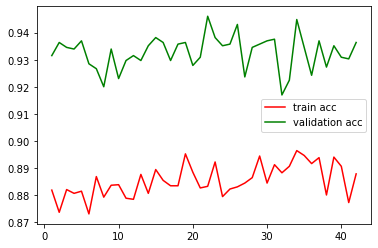

In [20]:
import matplotlib.pyplot as plt

acc=h.history["acc"]
val_acc=h.history["val_acc"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, c="red", label="train acc")
plt.plot(epochs, val_acc, c="green", label="validation acc")

plt.legend()

모델 불러오기

In [14]:
from tensorflow.keras.models import load_model

model = load_model("D:/model/fooddensenet210218-0001-0.9298.hdf5")

검증 데이터에 있는 이미지로 실제 결과 확인

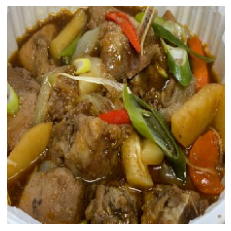

NameError: name 'model2' is not defined

In [15]:
def get_class_string_from_index(index):
    for class_string, class_index in validation_generator.class_indices.items():
        if class_index == index:
            return class_string

x, y = next(validation_generator)
image = x[2, :, :, :]
true_index = np.argmax(y[2])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model2.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(predicted_index))